In [369]:
import pandas as pd
import glob

folder_path = "/Users/sunvidaneja/Downloads/productDownload_2023-04-29T220900"

csv_files = glob.glob(folder_path + "/ACSDP5Y*-Data.csv")

data_frames = []
for file_path in csv_files:
    df = pd.read_csv(file_path, header=1)
    year = file_path.split('/')[-1][7:11]
    df['Year'] = year
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)
combined_df['Geographic Area Name'] = combined_df['Geographic Area Name'].str.replace('ZCTA5 ', '').astype(float)

/var/folders/2_/1r7kvrgj32vcvy8llqd70dj00000gn/T/ipykernel_96386/3144156747.py:10: DtypeWarning: Columns (3,4,219,220,459,460,516,517,523,524,563,564) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=1)
/var/folders/2_/1r7kvrgj32vcvy8llqd70dj00000gn/T/ipykernel_96386/3144156747.py:10: DtypeWarning: Columns (3,4,219,220,459,460,515,516,524,525,564,565) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=1)
/var/folders/2_/1r7kvrgj32vcvy8llqd70dj00000gn/T/ipykernel_96386/3144156747.py:10: DtypeWarning: Columns (75,76,84,85,99,100,104,105,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=1)
/var/folders/2_/1r7kvrgj32vcvy8llqd70dj00000gn/T/ipykernel_96386/3144156747.py:10: DtypeWarning: Columns (76,77,84,85,99,100,104,105,107,108) have mixed types. Specify dtype option on import or set low_memory=False

In [370]:
combined_df['Year'].value_counts()

2021    2705
2017    2652
2019    2652
2020    2652
2018    2652
2016    2612
2015    2612
2014    2588
2012    2588
2013    2588
2011    2588
Name: Year, dtype: int64

In [371]:
combined_df.shape

(28889, 1690)

In [372]:
combined_df

,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Annotation of Margin of Error!!SEX AND AGE!!Total population,Annotation of Estimate!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Annotation of Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total population,Annotation of Percent Margin of Error!!SEX AND AGE!!Total population,...,Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,Annotation of Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Margin of Error!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Annotation of Margin of Error!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Annotation of Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Annotation of Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races"
0,8600000US73949,73949.0,1439.0,202,NaN,NaN,1439.0,NaN,(X),(X),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8600000US75001,75001.0,13766.0,268,NaN,NaN,13766.0,NaN,(X),(X),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8600000US75002,75002.0,66679.0,1183,NaN,NaN,66679.0,NaN,(X),(X),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8600000US75006,75006.0,48583.0,469,NaN,NaN,48583.0,NaN,(X),(X),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8600000US75007,75007.0,52541.0,1018,NaN,NaN,52541.0,NaN,(X),(X),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28884,8600000US79938,79938.0,51367.0,2206,NaN,NaN,51367.0,NaN,(X),(X),...,0.3,NaN,253.0,127.0,NaN,NaN,0.5,NaN,0.2,NaN
28885,8600000US79942,79942.0,0.0,95,NaN,NaN,0.0,NaN,(X),(X),...,**,**,0.0,95.0,NaN,NaN,-,-,**,**
28886,8600000US88063,88063.0,12748.0,412,NaN,NaN,12748.0,NaN,(X),(X),...,0.3,NaN,0.0,89.0,NaN,NaN,0.0,NaN,0.3,NaN
28887,8600000US88220,88220.0,33973.0,663,NaN,NaN,33973.0,NaN,(X),(X),...,0.2,NaN,684.0,206.0,NaN,NaN,2.0,NaN,0.6,NaN


In [373]:
# Convert string columns to numeric types and drop columns that cannot be converted
for col in combined_df.select_dtypes(include='object').columns:
    try:
        combined_df[col] = pd.to_numeric(combined_df[col])
    except ValueError:
        combined_df = combined_df.drop(col, axis=1)

In [374]:
combined_df.shape

(28889, 681)

In [375]:
combined_df['Year']

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
28884    2011
28885    2011
28886    2011
28887    2011
28888    2011
Name: Year, Length: 28889, dtype: int64

In [376]:
combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('Margin of Error!!')]

In [377]:
# Find duplicates based on 'Year' and 'Zip Code'
duplicates_mask = combined_df.duplicated(subset=['Year', 'Geographic Area Name'], keep=False)

# Filter out duplicates
combined_df = combined_df[~duplicates_mask]

In [378]:
combined_df.shape

(21382, 383)

In [293]:
# Calculate percentage change
pct_change_df = combined_df.groupby('Geographic Area Name').apply(lambda x: x.drop(['Year', 'Geographic Area Name'], axis=1).pct_change() * 100)
pct_change_df['Year'] = combined_df['Year']
pct_change_df['Geographic Area Name'] = combined_df['Geographic Area Name']


# Replace infinite values with NaN
pct_change_df.replace([np.inf, -np.inf], np.nan, inplace=True)



In [294]:
pct_change_df

,Estimate!!SEX AND AGE!!Total population,Annotation of Estimate!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Annotation of Percent!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Annotation of Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Annotation of Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Under 5 years,Annotation of Estimate!!SEX AND AGE!!Under 5 years,...,Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Some other race alone,Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Some other race alone,Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races,Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races,Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Year,Geographic Area Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,73949.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,75001.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,75002.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,75006.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,75007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28884,-25.533488,NaN,-25.533488,NaN,0.0,NaN,0.0,NaN,-32.228336,NaN,...,-32.608696,NaN,-22.587269,NaN,-5.343511,NaN,-28.932584,NaN,2011,79938.0
28885,-100.000000,NaN,-100.000000,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,79942.0
28886,-5.633282,NaN,-5.633282,NaN,0.0,NaN,0.0,NaN,40.595010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,88063.0
28887,-3.598082,NaN,-3.598082,NaN,0.0,NaN,0.0,NaN,8.005427,NaN,...,12.195122,NaN,-4.149933,NaN,-13.513514,NaN,-3.661972,NaN,2011,88220.0


In [295]:

# Calculate percentage of missing values in each row
missing_percentages = pct_change_df.isna().sum(axis=1) / len(pct_change_df.columns) * 100

# Print the missing percentages for each row
print(missing_percentages.max)

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        99.477807
1        99.477807
2        99.477807
3        99.477807
4        99.477807
           ...    
28884    53.263708
28885    87.206266
28886    66.318538
28887    55.091384
28888    77.545692
Length: 21382, dtype: float64>


In [296]:
pct_change_df = pct_change_df[missing_percentages <= 90]

In [297]:
pct_change_df.shape

(18955, 383)

# PCA

In [298]:
acs = pct_change_df

In [299]:
acs = acs.rename(columns={'Geographic Area Name': 'Zip Code'})

In [300]:
acs.shape

(18955, 383)

In [301]:
acs = acs.sort_values('Year')

In [302]:
# # Find rows that are duplicated on 'Year' and 'Zip Code'
# mask = acs.duplicated(subset=['Year', 'Zip Code'], keep=False)

# # Create a DataFrame of duplicated rows
# duplicated_df = acs.loc[mask, :]

# # Calculate percentage of missing values in each row
# missing_percentages = duplicated_df.isna().sum(axis=1) / len(duplicated_df.columns) * 100

# # Print the missing percentages for each row
# print(missing_percentages.mean())

In [303]:
# # Find duplicates based on 'Year' and 'Zip Code'
# duplicates_mask = acs.duplicated(subset=['Year', 'Zip Code'], keep=False)

# # Filter out duplicates
# acs = acs[~duplicates_mask]

In [304]:
acs.shape

(18955, 383)

In [305]:
acs

,Estimate!!SEX AND AGE!!Total population,Annotation of Estimate!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Annotation of Percent!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Annotation of Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Annotation of Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Under 5 years,Annotation of Estimate!!SEX AND AGE!!Under 5 years,...,Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Some other race alone,Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Some other race alone,Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races,Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races,Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Annotation of Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Year,Zip Code
28888,234.782609,NaN,234.782609,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,88430.0
27584,-17.250367,NaN,-17.250367,NaN,0.000000,NaN,0.000000,NaN,-14.047252,NaN,...,NaN,NaN,1.017442,NaN,-11.267606,NaN,1.455093,NaN,2011,76542.0
27585,3.455890,NaN,3.455890,NaN,0.000000,NaN,0.000000,NaN,1.688671,NaN,...,NaN,NaN,-7.385079,NaN,-5.882353,NaN,-7.424594,NaN,2011,76543.0
27586,12.781376,NaN,12.781376,NaN,0.000000,NaN,0.000000,NaN,0.800178,NaN,...,-6.896552,NaN,-20.341394,NaN,NaN,NaN,-21.408250,NaN,2011,76544.0
27587,-9.818758,NaN,-9.818758,NaN,0.000000,NaN,0.000000,NaN,45.430945,NaN,...,100.000000,NaN,-11.867365,NaN,-42.857143,NaN,-11.484099,NaN,2011,76548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14526,-5.513602,NaN,-5.513602,NaN,-3.401609,NaN,-7.604563,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,76667.0
14525,-32.677165,NaN,-32.677165,NaN,-31.617647,NaN,-33.898305,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,76666.0
14524,10.772834,NaN,10.772834,NaN,8.037094,NaN,13.564669,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,76665.0
14522,-5.572597,NaN,-5.572597,NaN,-6.517190,NaN,-4.867158,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,76661.0


In [306]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# # Standardize the PCA-transformed data
# scaler = MinMaxScaler()
# acs_pca_scaled = scaler.fit_transform(acs)

In [307]:
# Calculate percentage of missing values in each column
missing_percentages = acs.isna().sum() / len(acs)

# Get column names where missing percentage is more than 80%
columns_to_drop = missing_percentages[missing_percentages > 0.8].index

# Drop columns with more than 80% missing values
acs = acs.drop(columns_to_drop, axis=1)

from sklearn.decomposition import PCA
import pandas as pd

# Filter out non-numeric columns
acs = acs.select_dtypes(include=[float, int])

from sklearn.impute import SimpleImputer

# Impute missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
acs_imputed = pd.DataFrame(imputer.fit_transform(acs), columns=acs.columns)

# Standardize the PCA-transformed data
scaler = MinMaxScaler()
acs_pca_scaled = scaler.fit_transform(acs_imputed)

# Perform PCA on the data
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(acs_pca_scaled)

# Transform the data into the new reduced-dimensional space
acs_transformed = pca.transform(acs_pca_scaled)

# Create a new DataFrame with the transformed data
acs_pca = pd.DataFrame(data=acs_transformed, columns=[f'PC{i}' for i in range(1, n_components+1)])


In [308]:
acs_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.523150,0.766194,0.164807,0.016885,0.005548,-0.004045,0.213682,-0.003381,0.005498,0.008814
1,0.520234,-0.060028,-0.053050,0.001372,0.001612,0.000417,0.004411,-0.021099,-0.009517,-0.000939
2,0.520453,-0.059169,-0.008736,0.001511,0.001048,0.001140,0.012973,-0.015847,-0.006862,-0.002337
3,0.519283,-0.057277,0.169327,-0.011871,-0.004314,0.002471,-0.116486,-0.030332,-0.009271,0.004864
4,0.520352,-0.059114,-0.026670,0.000421,0.001067,0.000701,-0.002612,-0.017315,-0.007770,-0.001403
...,...,...,...,...,...,...,...,...,...,...
18950,-0.479340,-0.050366,-0.004812,-0.010411,0.002294,-0.005099,0.002776,0.004262,-0.007261,0.011198
18951,-0.478487,-0.050901,-0.005461,-0.035771,0.004893,-0.036609,0.003645,0.003352,-0.003971,-0.035468
18952,-0.480407,-0.050220,-0.004641,0.007963,0.005866,0.001735,0.002011,0.000893,0.000831,0.050937
18953,-0.479908,-0.050561,-0.004991,-0.014452,0.008064,-0.025156,0.003437,0.002831,-0.005768,0.007040


In [309]:
acs_imputed['Zip Code']

0        88430.0
1        76542.0
2        76543.0
3        76544.0
4        76548.0
          ...   
18950    76667.0
18951    76666.0
18952    76665.0
18953    76661.0
18954    75420.0
Name: Zip Code, Length: 18955, dtype: float64

In [310]:
acs_pca_with_year = pd.concat([acs_pca, acs_imputed['Year'], acs_imputed['Zip Code']], axis=1)

In [311]:
acs_pca_with_year

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Year,Zip Code
0,0.523150,0.766194,0.164807,0.016885,0.005548,-0.004045,0.213682,-0.003381,0.005498,0.008814,2011.0,88430.0
1,0.520234,-0.060028,-0.053050,0.001372,0.001612,0.000417,0.004411,-0.021099,-0.009517,-0.000939,2011.0,76542.0
2,0.520453,-0.059169,-0.008736,0.001511,0.001048,0.001140,0.012973,-0.015847,-0.006862,-0.002337,2011.0,76543.0
3,0.519283,-0.057277,0.169327,-0.011871,-0.004314,0.002471,-0.116486,-0.030332,-0.009271,0.004864,2011.0,76544.0
4,0.520352,-0.059114,-0.026670,0.000421,0.001067,0.000701,-0.002612,-0.017315,-0.007770,-0.001403,2011.0,76548.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18950,-0.479340,-0.050366,-0.004812,-0.010411,0.002294,-0.005099,0.002776,0.004262,-0.007261,0.011198,2021.0,76667.0
18951,-0.478487,-0.050901,-0.005461,-0.035771,0.004893,-0.036609,0.003645,0.003352,-0.003971,-0.035468,2021.0,76666.0
18952,-0.480407,-0.050220,-0.004641,0.007963,0.005866,0.001735,0.002011,0.000893,0.000831,0.050937,2021.0,76665.0
18953,-0.479908,-0.050561,-0.004991,-0.014452,0.008064,-0.025156,0.003437,0.002831,-0.005768,0.007040,2021.0,76661.0


In [312]:
acs_pca_with_year.to_csv('acs_pca_with_year_ratechange.csv')

In [313]:
# Get the explained variance ratios
explained_variances = pca.explained_variance_ratio_
print('Explained variance ratios:', explained_variances)

Explained variance ratios: [0.70539142 0.06857293 0.0175875  0.0129464  0.01169019 0.00999782
 0.00881961 0.00562099 0.00550223 0.00495475]


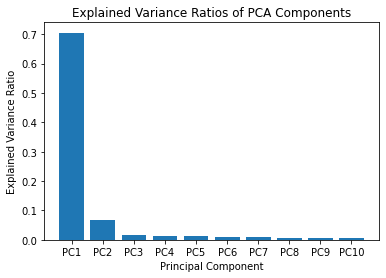

In [314]:
import matplotlib.pyplot as plt

# Get the explained variance ratios
explained_variances = pca.explained_variance_ratio_

# Plot the explained variance ratios as a bar plot
fig, ax = plt.subplots()
ax.bar(range(len(explained_variances)), explained_variances)

# Set the x-axis labels to PC1, PC2, etc.
ax.set_xticks(range(len(explained_variances)))
ax.set_xticklabels([f'PC{i}' for i in range(1, len(explained_variances)+1)])

# Set the y-axis label
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratios of PCA Components')

# Show the plot
plt.show()


In [315]:
# Get the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components+1)], index=acs.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Estimate!!SEX AND AGE!!Total population,-0.000384,0.000304,0.018417,0.147993,0.062909,-0.043628,0.007704,-0.000141,-0.000503,-0.007186
Percent!!SEX AND AGE!!Total population,-0.000474,0.000452,0.021033,0.144134,0.067487,-0.044147,0.007786,0.000625,-0.000702,-0.007184
Estimate!!SEX AND AGE!!Total population!!Male,-0.000508,0.000015,0.005437,0.145604,0.063746,-0.045267,-0.011296,0.000029,-0.000379,-0.006935
Estimate!!SEX AND AGE!!Total population!!Female,-0.000358,0.000194,0.004288,0.024416,-0.010872,0.033895,0.002158,0.000301,0.000768,-0.000540
Estimate!!SEX AND AGE!!Under 5 years,0.004153,0.002258,0.026650,0.002740,0.000399,0.001222,0.040475,0.039217,0.012439,0.007571
...,...,...,...,...,...,...,...,...,...,...
Estimate!!RACE!!One race.1,0.000260,-0.000090,0.021709,0.003860,0.000915,0.000840,0.071583,-0.000585,0.004449,0.007306
Estimate!!RACE!!White,-0.000017,-0.000341,0.018822,0.002745,0.000617,0.000665,0.053836,-0.004896,0.002037,0.005156
Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino,0.000333,0.000420,0.018707,0.003085,0.000633,0.000789,0.057140,-0.003432,0.002890,0.006571
Year,-0.999616,0.000140,-0.001455,-0.009495,0.001352,-0.005591,0.005066,0.014146,-0.001768,-0.008600


In [316]:
# Get the loadings matrix
loadings = pca.components_

# Get the loadings for PC1
loadings_pc1 = loadings[0]

# Get the indices of the features with the highest loadings in PC1
idx_max_loadings = loadings_pc1.argsort()[::-1]

# Get the names of the columns with the highest loadings in PC1
cols_max_loadings = acs.columns[idx_max_loadings]

# Print the column names and their corresponding loadings
for col, loading in zip(cols_max_loadings, loadings_pc1[idx_max_loadings]):
    print(f'{col}: {loading}')


Estimate!!RACE!!One race!!Some other race: 0.011971498113517956
Estimate!!RACE!!One race!!American Indian and Alaska Native: 0.006969339011608468
Estimate!!SEX AND AGE!!45 to 54 years: 0.004509104778005946
Estimate!!SEX AND AGE!!Under 5 years: 0.004152972951003583
Estimate!!SEX AND AGE!!35 to 44 years: 0.003935550199866857
Estimate!!SEX AND AGE!!85 years and over: 0.0032542064296251145
Estimate!!RACE!!Two or more races!!White and American Indian and Alaska Native: 0.003220068930579626
Estimate!!SEX AND AGE!!75 to 84 years: 0.002947330446564353
Estimate!!RACE!!One race!!Black or African American: 0.0028128840158813204
Estimate!!SEX AND AGE!!5 to 9 years: 0.0025464996747153646
Estimate!!SEX AND AGE!!20 to 24 years: 0.0025297134408745797
Estimate!!RACE!!Two or more races!!White and Black or African American: 0.0021349911011839836
Estimate!!SEX AND AGE!!55 to 59 years: 0.0020768506834479106
Estimate!!SEX AND AGE!!10 to 14 years: 0.001989576154063527
Estimate!!RACE!!One race!!Asian!!Asian I

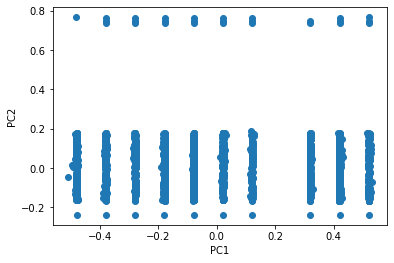

In [317]:
import matplotlib.pyplot as plt

plt.scatter(acs_pca['PC1'], acs_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


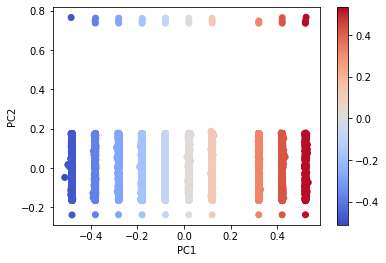

In [318]:
# Calculate percentage of missing values in each column
missing_percentages = acs.isna().sum() / len(acs)

# Get column names where missing percentage is more than 80%
columns_to_drop = missing_percentages[missing_percentages > 0.8].index

# Drop columns with more than 80% missing values
acs = acs.drop(columns_to_drop, axis=1)

from sklearn.decomposition import PCA
import pandas as pd

# Filter out non-numeric columns
acs = acs.select_dtypes(include=[float, int])

from sklearn.impute import SimpleImputer

# Impute missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
acs_imputed = pd.DataFrame(imputer.fit_transform(acs), columns=acs.columns)

# Standardize the PCA-transformed data
scaler = MinMaxScaler()
acs_pca_scaled = scaler.fit_transform(acs_imputed)

# Perform PCA on the data
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(acs_pca_scaled)

# Transform the data into the new reduced-dimensional space
acs_transformed = pca.transform(acs_pca_scaled)

# Remove outliers
from scipy.spatial.distance import mahalanobis

distances = []
for i in range(acs_transformed.shape[0]):
    dist = mahalanobis(acs_transformed[i], np.mean(acs_transformed, axis=0), np.cov(acs_transformed.T))
    distances.append(dist)

median_distance = np.median(distances)
threshold = 3 * median_distance

acs_pca = pd.DataFrame(data=acs_transformed, columns=[f'PC{i}' for i in range(1, n_components+1)])
acs_pca = acs_pca[distances <= threshold]

# Plot the PCA with PC1 and PC2 color-coded differently
plt.scatter(acs_pca['PC1'], acs_pca['PC2'], c=acs_pca['PC1'], cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

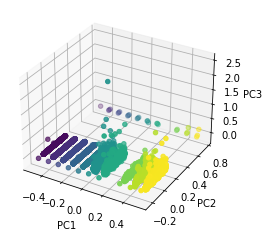

In [319]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with different colors based on PC1 values
ax.scatter(acs_pca['PC1'], acs_pca['PC2'], acs_pca['PC3'], c=acs_pca['PC1'], cmap='viridis')

# Set labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


In [320]:
loadings = pca.components_[0]
sorted_loadings = sorted(zip(loadings, acs.columns), reverse=True)
top_features = [feature for loading, feature in sorted_loadings[:20]]
print(top_features)

['Estimate!!RACE!!One race!!Some other race', 'Estimate!!RACE!!One race!!American Indian and Alaska Native', 'Estimate!!SEX AND AGE!!45 to 54 years', 'Estimate!!SEX AND AGE!!Under 5 years', 'Estimate!!SEX AND AGE!!35 to 44 years', 'Estimate!!SEX AND AGE!!85 years and over', 'Estimate!!RACE!!Two or more races!!White and American Indian and Alaska Native', 'Estimate!!SEX AND AGE!!75 to 84 years', 'Estimate!!RACE!!One race!!Black or African American', 'Estimate!!SEX AND AGE!!5 to 9 years', 'Estimate!!SEX AND AGE!!20 to 24 years', 'Estimate!!RACE!!Two or more races!!White and Black or African American', 'Estimate!!SEX AND AGE!!55 to 59 years', 'Estimate!!SEX AND AGE!!10 to 14 years', 'Estimate!!RACE!!One race!!Asian!!Asian Indian', 'Estimate!!SEX AND AGE!!15 to 19 years', 'Estimate!!SEX AND AGE!!25 to 34 years', 'Estimate!!RACE!!One race!!Asian!!Korean', 'Estimate!!RACE!!One race!!Asian!!Japanese', 'Estimate!!RACE!!Two or more races']


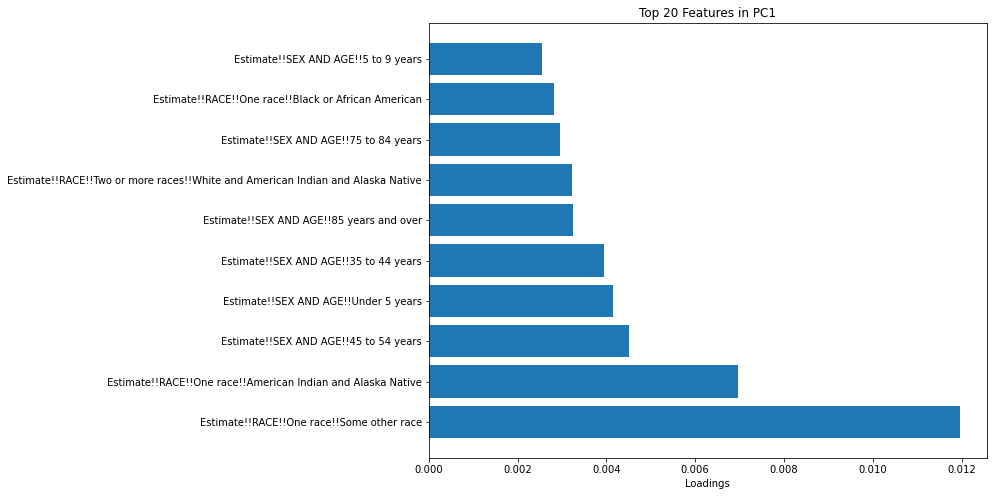

In [321]:
import matplotlib.pyplot as plt

loadings = pca.components_[0]
sorted_loadings = sorted(zip(loadings, acs.columns), reverse=True)
top_features = [feature for loading, feature in sorted_loadings[:10]]

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_features, [loading for loading, feature in sorted_loadings[:10]])
ax.set_xlabel('Loadings')
ax.set_title('Top 20 Features in PC1')
plt.show()


# TSNE

/Users/sunvidaneja/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sunvidaneja/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


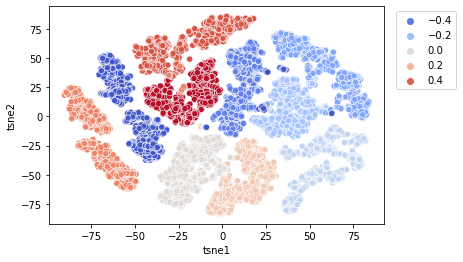

In [322]:
from sklearn.manifold import TSNE

# Create a t-SNE object with two components
tsne = TSNE(n_components=2)

# Fit and transform the PCA-transformed data with t-SNE
acs_tsne = tsne.fit_transform(acs_transformed)

# Create a new DataFrame with the t-SNE transformed data
acs_tsne_df = pd.DataFrame(data=acs_tsne, columns=['tsne1', 'tsne2'])

# Plot the t-SNE transformed data with PC1 and PC2 as color codes
sns.scatterplot(data=acs_tsne_df, x='tsne1', y='tsne2', hue=acs_pca['PC1'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()



# Singular Value Decomposition

In [133]:
from sklearn.decomposition import TruncatedSVD

# Perform SVD on the data
svd = TruncatedSVD(n_components=10)
svd.fit(acs_imputed)

# Transform the data into the new reduced-dimensional space
acs_transformed_svd = svd.transform(acs_imputed)

# Create a new DataFrame with the transformed data
acs_svd = pd.DataFrame(data=acs_transformed_svd, columns=[f'SVD{i}' for i in range(1, n_components+1)])

In [95]:
acs_svd

,SVD1,SVD2,SVD3,SVD4,SVD5,SVD6,SVD7,SVD8,SVD9,SVD10
0,8.735375e+06,36522.730104,67755.146841,22370.510064,-15751.669599,-819.183101,-76.538405,-532.726173,-6.734537,-966.874607
1,4.319674e+03,-92.243197,-694.240728,-446.374639,139.406440,-60.010556,-62.550475,-42.187766,-28.140993,-47.025727
2,8.459997e+01,-9.938480,-86.228208,-81.320770,12.637140,1.940980,-22.549279,-19.696085,3.964980,-12.905912
3,6.684486e+04,-7646.768783,7429.150036,-6938.646603,2334.576709,793.438102,-1384.971213,116.477020,624.909836,-146.217572
4,2.416950e+05,-24506.550102,-15143.338421,5949.375250,-1277.878301,4279.432825,3702.271058,-1663.384547,-2300.368555,135.957453
...,...,...,...,...,...,...,...,...,...,...
1988,8.753537e+04,-4662.463453,-5961.045052,-1060.349876,1298.963585,-1384.116801,561.055610,2251.939420,3359.499086,457.658181
1989,6.012893e+04,1797.120101,-5630.762723,-4665.452489,572.689979,-563.022967,652.657464,-423.604535,-124.182624,1103.745413
1990,3.536587e+05,3395.252798,-15570.935660,-5340.113922,-782.094654,-4773.825237,9320.600227,3811.221481,-520.902114,2790.330374
1991,2.743678e+05,-933.987671,-28812.082963,10918.739585,4962.513562,-2511.372919,-438.452822,10236.713157,7249.991832,710.728606


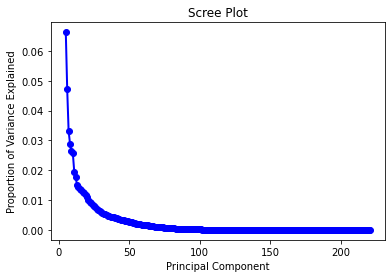

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Perform SVD on the data
U, s, Vt = np.linalg.svd(acs_pca_scaled)

# Calculate the explained variance by each principal component
explained_variance = (s ** 2) / (len(s) - 1)
explained_variance = explained_variance[4:]
# Plot the scree plot
plt.plot(range(5, len(s)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()
